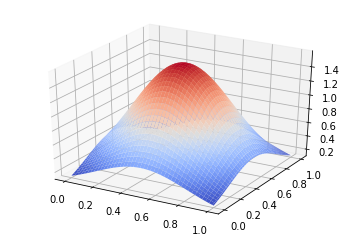

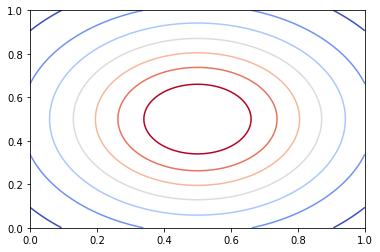

In [1]:
import numpy as np
import scipy as scipy
from scipy.stats import norm, multivariate_normal

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')

fig = plt.figure(2)
ax2 = fig.add_subplot(111)

x = np.linspace(0,1,128)
y = np.linspace(0,1,128)

xv,yv = np.meshgrid(x,y)

# print(xv)
# print(yv)

mu = [0.5,0.5] # mean..

sigma = [[0.1,0.],[0.,0.1]] # variance..

rv = multivariate_normal(mean=mu,cov=sigma)

cmesh = np.stack([xv,yv],axis=-1).astype('float32') #3d tensor, last axis [xv,yv]

d = rv.pdf(cmesh)

ax.plot_surface(xv,yv,d,cmap=cm.coolwarm)
ax2.contour(xv,yv,d,cmap=cm.coolwarm)

plt.show()

(128, 128, 2)


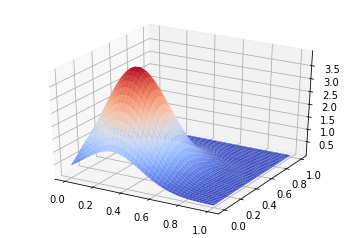

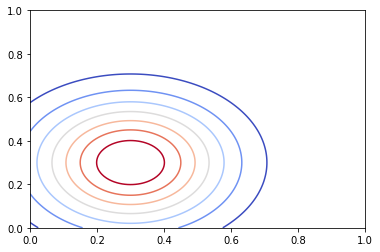

In [2]:
import tensorflow as tf
from tensorflow.contrib.distributions import MultivariateNormalDiag as mnd
from tensorflow.contrib.distributions import MultivariateNormalFull as mnf

# cmesh2 = np.expand_dims(cmesh,axis=2)
cmesh2 = cmesh

print(cmesh2.shape)

cv = tf.Variable(cmesh2)
# cv = tf.Variable([[.5,.5],[.5,.5],[.5,.5]])

unit_variance = tf.Variable([1.,1.])

variances = tf.Variable([.2])

means = tf.Variable([0.3,0.3])

mndi = mnd(means, variances * unit_variance) # mnd instance
mnfi = mnf(mu, sigma) # mnf instance

pd = mndi.pdf(cv)
# pd = mnfi.pdf(cv)

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    d = sess.run(pd)

# print(d)
def plotit():
    fig = plt.figure(3)
    ax = fig.add_subplot(111, projection='3d')

    fig = plt.figure(4)
    ax2 = fig.add_subplot(111)

    ax.plot_surface(xv,yv,d,cmap=cm.coolwarm)
    # ax2.plot_surface(xv,yv,d[1],cmap=cm.coolwarm)
    
    ax2.contour(xv,yv,d,cmap=cm.coolwarm)
    plt.show()
    
plotit()

In [3]:
uv = np.array([1.,1.])
vs = np.array([[.1],[.2]])

uv*vs

array([[ 0.1,  0.1],
       [ 0.2,  0.2]])